In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Load data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
y_test = test_data[['Pclass','Age','SibSp','Parch','Sex','Fare']]

# One_hot Encoding for categorical data

yoh= pd.get_dummies(y_test)
# filling NaN
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
ys_test= my_imputer.fit_transform(yoh)
#Normalizing the input data
from sklearn import preprocessing
yn_test = preprocessing.StandardScaler().fit(ys_test).transform(ys_test)
yn_test


array([[ 0.87348191,  0.3349926 , -0.49947002, ..., -0.49840706,
        -0.75592895,  0.75592895],
       [ 0.87348191,  1.32553003,  0.61699237, ..., -0.51327429,
         1.32287566, -1.32287566],
       [-0.31581919,  2.51417495, -0.49947002, ..., -0.46508846,
        -0.75592895,  0.75592895],
       ...,
       [ 0.87348191,  0.65196458, -0.49947002, ..., -0.50879189,
        -0.75592895,  0.75592895],
       [ 0.87348191,  0.        , -0.49947002, ..., -0.4944482 ,
        -0.75592895,  0.75592895],
       [ 0.87348191,  0.        ,  0.61699237, ..., -0.23790598,
        -0.75592895,  0.75592895]])

In [5]:
X =train_data[['Pclass','Age','SibSp','Parch','Sex','Fare']]
y = np.asarray(train_data[['Survived']])

# One_hot Encoding for categorical data

Xoh= pd.get_dummies(X)

# filling NaN
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
Xs= my_imputer.fit_transform(Xoh)

#Normalizing the input data
from sklearn import preprocessing
Xn = preprocessing.StandardScaler().fit(Xs).transform(Xs)
Xn.shape



(891, 7)

In [6]:
#Splitting trainind and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split( Xn, y, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_val.shape,  y_val.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)


Train set: (801, 7) (801, 1)
Test set: (90, 7) (90, 1)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
#Predicting using our validation data because we have the true outpu data 
#thus we will use this data to evaluate our algorithm. 

yhat = LR.predict(X_val)
yhat

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1])

In [8]:
#predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, 
#P(Y=0|X), and second column is probability of class 1, P(Y=1|X)
yhat_prob = LR.predict_proba(X_val)
yhat_prob[0:5]

array([[0.75626629, 0.24373371],
       [0.75754212, 0.24245788],
       [0.37295428, 0.62704572],
       [0.21116188, 0.78883812],
       [0.79646644, 0.20353356]])

In [9]:
#Evaluation of the accuracy of the ML program.
from sklearn.metrics import jaccard_score
jaccard_score(y_val, yhat,pos_label=0)


0.8028169014084507

In [10]:
#I got this confusion matrix function from IBM machine learning course. 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_val, yhat, labels=[1,0]))

[[19  8]
 [ 6 57]]


Confusion matrix, without normalization
[[19  8]
 [ 6 57]]


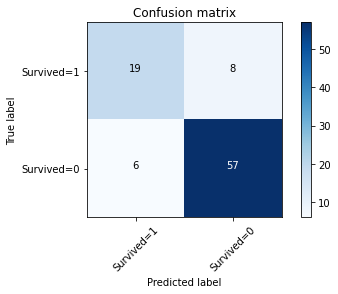

In [11]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','Survived=0'],normalize= False,  title='Confusion matrix')

In [12]:
print (classification_report(y_val, yhat))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        63
           1       0.76      0.70      0.73        27

    accuracy                           0.84        90
   macro avg       0.82      0.80      0.81        90
weighted avg       0.84      0.84      0.84        90



In [13]:
from sklearn.metrics import log_loss
log_loss(y_val, yhat_prob)

0.4307476430319787

In [14]:
# Test data that is required to be predicted and submitted.
output = LR.predict(yn_test)
output

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [15]:
Output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': output})
Output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [16]:
Output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
